In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import time


In [1]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def padding_image(img):
    (dim1,dim2,dim3) = img.shape
    new_image = np.zeros( shape=(256,256,dim3) )
    new_image[0:dim1,0:dim2,0:dim3] = img
    return new_image

def str_fun(i):
    if i<=9:
        return "00"+str(i)
    if i<=99:
        return "0"+str(i)
    return str(i)

x_train = []
y_train = []

for i in range(1,101):
    path_iniz = "training/"
    patient = "patient" + str_fun(i)
    path_iniz += patient
    patient+="_frame*"
    result = find(patient, path_iniz)
    result_other=[]
    for name in result:
        if fnmatch.fnmatch(name, "*frame01"):
            if fnmatch.fnmatch(name, "*_gt.nii.gz"):
                img = nib.load(name)
                if(np.max(img.shape)<257):
                    #y_train.append(img.get_fdata())
                    y_train.append(padding_image(img.get_fdata()))
            else:
                img = nib.load(name)
                if(np.max(img.shape)<257):
                    #x_train.append(img.get_fdata())
                    x_train.append(padding_image(img.get_fdata()))
        else:
            result_other.append(name)
    for name in result_other:
        if fnmatch.fnmatch(name, "*_gt.nii.gz"):
            img = nib.load(name)
            if(np.max(img.shape)<257):
                #y_train.append(img.get_fdata())
                y_train.append(padding_image(img.get_fdata()))
        else:
            img = nib.load(name)
            if(np.max(img.shape)<257):
                #x_train.append(img.get_fdata())
                x_train.append(padding_image(img.get_fdata()))
    
    

In [4]:
len(x_train)

190

In [5]:
# total 2D images
tot = 0
for i in range(len(x_train)):
    tot += x_train[i].shape[2]
tot

1812

In [7]:
# total 2D images
tot = 0
for i in range(len(x_train)):
    tot += x_train[i].shape[2]

x_2d = np.zeros(shape=(tot,256,256))
y_2d = np.zeros(shape=(tot,256,256))

index = 0

for i in range(len(x_train)):
    for ii in range(x_train[i].shape[2]):
        x_2d[index+ii,:,:] = x_train[i][:,:,ii]
        y_2d[index+ii,:,:] = y_train[i][:,:,ii]
        
    index+=x_train[i].shape[2]

In [3]:
#1812

#train = 1200
#val = 200
#test = 412

In [8]:
x_2d_train = x_2d[0:1200,:,:]
y_2d_train = y_2d[0:1200,:,:]

x_2d_val = x_2d[1200:1400,:,:]
y_2d_val = y_2d[1200:1400,:,:]

x_2d_test = x_2d[1400:1812,:,:]
y_2d_test = y_2d[1400:1812,:,:]

In [9]:
np.random.seed(10)
index = np.random.permutation(1200)
x_2d_train = x_2d_train[index,:,:]
y_2d_train = y_2d_train[index,:,:]

index = np.random.permutation(200)
x_2d_val = x_2d_val[index,:,:]
y_2d_val = y_2d_val[index,:,:]

index = np.random.permutation(412)
x_2d_test = x_2d_test[index,:,:]
y_2d_test = y_2d_test[index,:,:]

In [11]:
x_2d_train = np.expand_dims(x_2d_train, axis=3)
y_2d_train = np.expand_dims(y_2d_train, axis=3)

x_2d_val = np.expand_dims(x_2d_val, axis=3)
y_2d_val = np.expand_dims(y_2d_val, axis=3)

x_2d_test = np.expand_dims(x_2d_test, axis=3)
y_2d_test = np.expand_dims(y_2d_test, axis=3)

In [12]:
x_2d_train.shape

(1200, 256, 256, 1)

In [13]:
np.save("x_2d_train.npy", x_2d_train)
np.save("y_2d_train.npy", y_2d_train)

np.save("x_2d_val.npy", x_2d_val)
np.save("y_2d_val.npy", y_2d_val)

np.save("x_2d_test.npy", x_2d_test)
np.save("y_2d_test.npy", y_2d_test)

In [4]:
x_2d_train = np.load("x_2d_train.npy")
y_2d_train = np.load("y_2d_train.npy")

In [7]:
print(np.sum(y_2d_train[0,:,:,0]==0))
print(np.sum(y_2d_train[0,:,:,0]==1))
print(np.sum(y_2d_train[0,:,:,0]==2))
print(np.sum(y_2d_train[0,:,:,0]==3))

62401
1479
543
1113


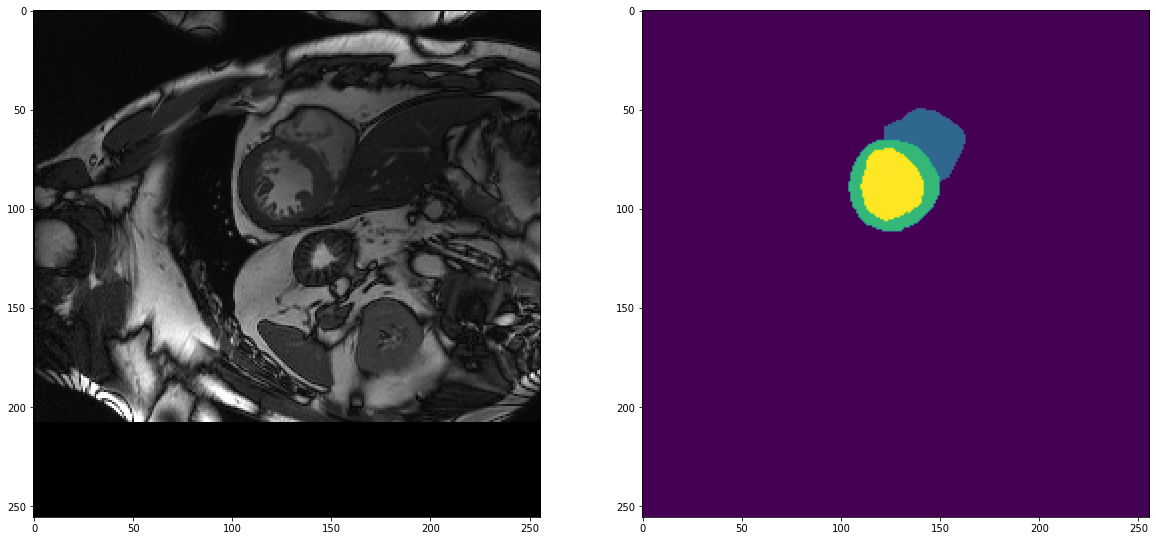

In [30]:
n=4

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(x_2d_train[n,:,:,0], 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(y_2d_train[n,:,:,0])
plt.savefig("acdc_prova.png")
plt.show()